# Lab in groups, Numerical Methods UNAL 2023-2
## Group 26
### Members:
### Karem Nataly Sierra Molina, Unal id: ksierram, last digit: 2
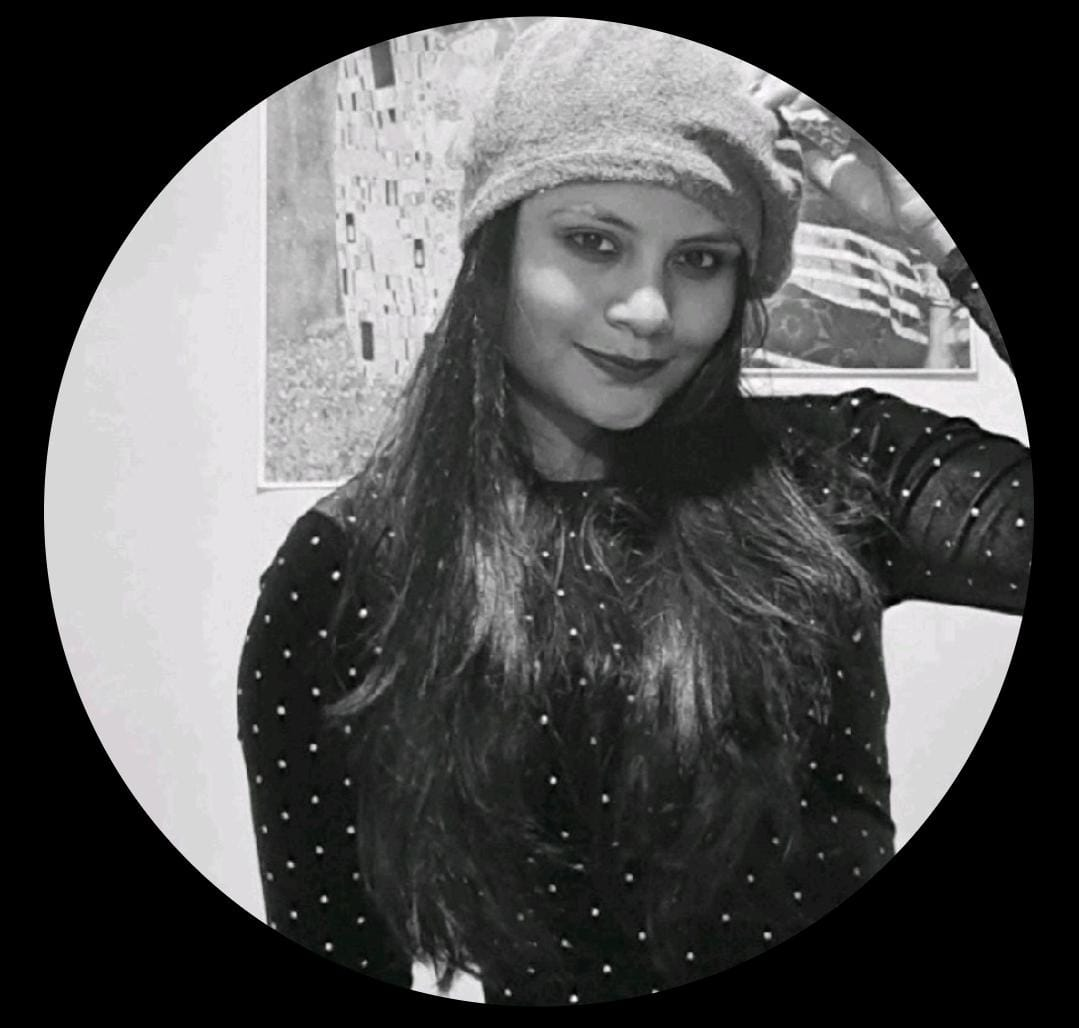

### Carlos Ivan Muñoz Villazon, Unal id: camunozv, last digit: 6
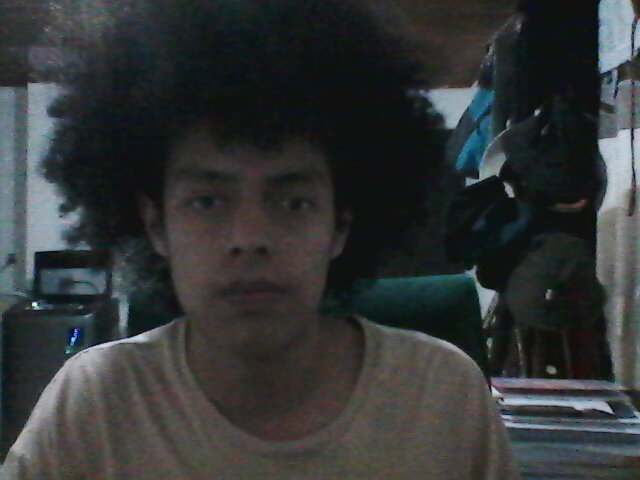

### Valeria Mora Serrano, Unal id: vmoras, last digit: 9
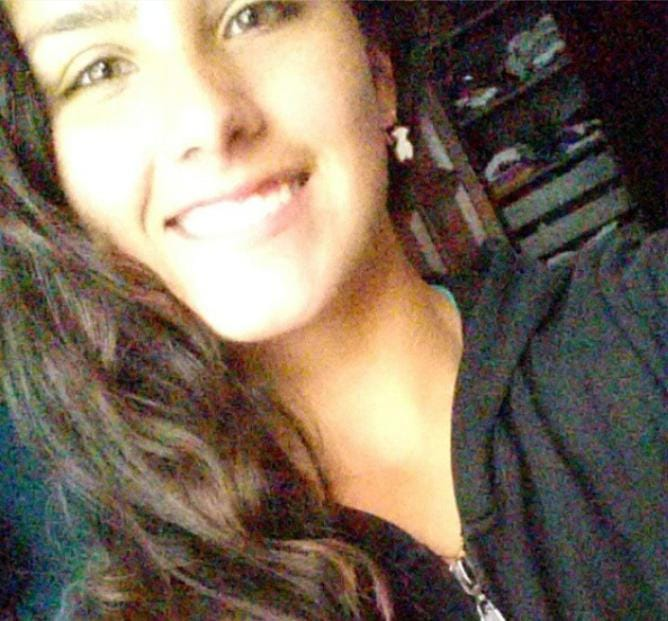


Modify [week_1_quadratic_Po_Shen_Loh.ipyn](https://colab.research.google.com/drive/15vXGB18_np6o0Rw8ZV4o08RTdCdDIdT0?usp=sharing) for

$$ ax^3 + bx^2 + cx +d = 0$$

using Cubic equation – Cardano–Tartaglia formula- [wikipedia](https://en.wikipedia.org/wiki/Cubic_equation)

Asuume $a=1$ then work wequations are of the form

$$ x^3 + bx^2 + cx + d = 0$$

Including expalnataions. plots, solution code and test cases

## Our own example with the following polynomial:

1. $ 2x^{3} + 5x^{2} + 7x + 1= 0 $ with regular indices

2. $ x^{3} + \frac{5}{2}x^{2} + \frac{7}{2}x + \frac{1}{2}= 0 $ dividing by the $ A $ coefficient.

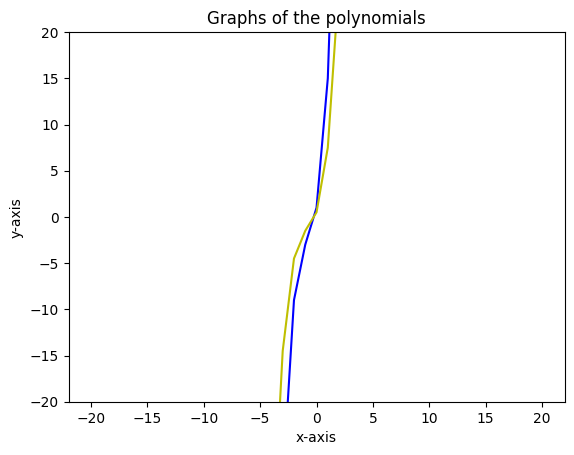

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_1(a, b, c, d, x): # evaluate the value of a polynomial
  return a*(x**3) + (b * (x**2)) + (c * (x)) + d

def cubic_2(a, b, c, d, x): # simplifies the polinomial
  return (x**3) + ((b/a) * (x**2)) + ((c/a) * (x)) + (d/a)

x_axis = np.arange(-20,21)
y_axis = np.zeros(len(x_axis))

polynomial_1 = cubic_1(2,5,7,1,x_axis) # regular polynomial evaluation
polynomial_2 = cubic_2(2,5,7,1,x_axis) # dividing by the first coefficient

plt.plot(x_axis, polynomial_1, '-b')
plt.plot(x_axis, polynomial_2, '-y')
# plt.plot(x_axis, y_axis, '-k')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.ylim(-20, 20)
plt.title('Graphs of the polynomials')

plt.show()

## Finding the roots of the polynomial:

The following function aims to solve a polynomial of $3-th$ degree by using the Cardano-Tartaglia method, which involves finding discriminants and other values neccessary to find the roots of a given polynomial.

The formulas required are this ones:

### 1. $ p \land q $ values, required for calculating the discriminant

$$ p = c - \frac{b^2}{3} $$ $$ q = d - \frac{bc}{3} + \frac{2b^3}{27} $$

### 2. Calculate the discriminant: $ \Delta $ (delta)

$$ \Delta = \frac{q^2}{4} + \frac{p^3}{27} $$

### 3. Find $ α \land β $ which help with the complex solutions

$$ α = \sqrt[3]{- \frac{q}{2} + \sqrt{Δ}} $$

$$ β = \sqrt[3]{- \frac{q}{2} - \sqrt{Δ}} $$

### 4. Find $ \omega $ and $ \omega^2 $

$$ \omega = -\frac{1}{2} + \frac{\sqrt{3}}{2} i$$

$$ \omega^2 = -\frac{1}{2} - \frac{\sqrt{3}}{2} i$$

### 5. Find the roots

$$ x_1 = \alpha + \beta - \frac{b}{3} $$

$$ x_2 = \alpha ⋅ \omega + \beta ⋅ ω^2 - \frac{b}{3} $$

$$ x_3 = \alpha ⋅ \omega^2 + \beta ⋅ ω - \frac{b}{3} $$

In [4]:
def cubic_evaluation(b,c,d,x): # evaluate a cubic polynomial for a given value of x
    """Calulate the value of the  cubic equation, v = x**3 + bx**2 + c*x +d

    Parameters
    ----------
    b, c,d  : float
       Coefficients

    Returns
    -------
    v : float """

    return (x**3) + (b * (x**2)) + (c * (x)) + d

In [3]:
import math

def solve_cubic(b,c,d):
    """Solve a cubic equation, x**3 + bx**2 + c*x +d = 0.

    Parameters
    ----------
    b, c, d : float
       Coefficients

    Returns
    -------
    x1, x2, x3 : float or complex Roots.
    """

    p = c - ((b**2)/3)
    q = d - ((b * c) / 3) + ((2 * (b ** 3)/27))

    discriminant = (4 * (p**3)) + (27 * (q**2))

    if discriminant < 0: # three real roots all distinct

        alpha = (complex(-q/2, math.sqrt(abs(discriminant / 108))))**(1/3)
        beta = (complex(-q/2 , - math.sqrt(abs(discriminant / 108))))**(1/3)
        y1 = alpha + beta - (b/3)

        omega_1 = complex(-1/2, math.sqrt(3)/2)
        omega_2 = complex(-1/2, -math.sqrt(3)/2)

        y2 = (alpha * omega_1) + (beta * omega_2) - (b/3)
        y3 = (alpha * omega_2) + (beta * omega_1) - (b/3)

    elif discriminant > 0: # 1 real solution and 2 complex solution
        discriminant = (q/2)**2 + (p/3)**3
        q = (2*b**3 - 9*b*c + 27*d) / 27
        R = -(q / 2.0) + math.sqrt(discriminant)
        if R >= 0:
            S = R ** (1 / 3.0)
        else:
            S = -(-R) ** (1 / 3.0)
        T = -(q / 2.0) - math.sqrt(discriminant)
        if T >= 0:
            U = (T ** (1 / 3.0))
        else:
            U = -((-T) ** (1 / 3.0))

        y1 = (S + U) - (b / 3.0)
        y2 = -(S + U) / 2 - (b / 3.0) + (S - U) * math.sqrt(3) * 0.5j
        y3 = -(S + U) / 2 - (b / 3.0) - (S - U) * math.sqrt(3) * 0.5j

    else: # 3 real roots but one is repeated
        alpha = ((-q/2) + math.sqrt(discriminant / 108))**(1/3)
        y1 = (2 * alpha) - (b/3)
        y2 = (-1 * alpha) - (b/3)
        y3 = (-1 * alpha) - (b/3)

    return y1, y2, y3

Bulit test cases that include

$$x^3 =1,$$

$$(x-1)^3 = x^3 - 3 x^2 + 3 x - 1,$$

$$(x-1)(x-i)(x+i) = x^3 - x^2 + x - 1, $$
three real diferent roots,  roots in the last digits of the group members, root of mtiuplicity two, and complex roots with small and large $b$.

**Polynomials**

1. $x^3$
2. $x^3 - 3x^2 + 3x - 1 $
3. $x^3 - x^2 + x - 1 $
4. $x^3 + 2x^2 + 6x + 9 $
5. $x^3 -300x^2 + x - 1 $
6. $x^3 +300x^2 - x - 1 $
7. $x^3 -4x^2 + 5x - 1 $

**Unfortunately for bigger numbers we get round-off errors.**

8. $x^3 +10000x^2 + 5x - 2 $
9. $x^3 +1000000x^2 + 5x - 2 $
10. $x^3 +10000000x^2 + 5x - 2 $

**Last digits:**

1. Valeria : 9
2. Nataly : 2
3. Carlos : 6

In [5]:
from numpy import allclose

variants = [{'b': 0.0, 'c': 0.0, 'd': 0.0},
            {'b': -3.0, 'c': 3.0, 'd':-1.0},
            {'b': -1.0, 'c': 1.0, 'd':-1.0},
            {'b': -6.0, 'c': 11.0, 'd':-6.0},  # Three real diferent roots
            {'b': 2, 'c': 6, 'd': 9},   # Last digits of the group members
            {'b': -300.0, 'c': 1.0, 'd':-1.0},  # Complex roots with small b
            {'b': 300.0, 'c': -1.0, 'd':-1.0},  # Complex roots with large b
            {'b': -4.0, 'c': 5.0, 'd':-2.0}, # Root of multiplicity two
            {'b': 10000, 'c': 5.0, 'd':-2.0},
            {'b': 1000000, 'c': 5.0, 'd':-2.0},
            {'b': 100000000, 'c': 5.0, 'd':-2.0},
]

for var in variants:
    x1, x2, x3 = solve_cubic(**var)
    print(allclose(cubic_evaluation(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic_evaluation(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic_evaluation(var['b'],var['c'],var['d'],x3), 0.0))


True
True
True
True
True
True
True
True
False
False
False


### More interesting cases:

In [8]:
from numpy import allclose

vvariants = [{'b': 0.0, 'c': 0.0, 'd': -1.0},
            {'b': -3.0, 'c': 3.0,  'd':-1.0},
            {'b': -1.0, 'c': 1.0,  'd':-1.0},
            {'b':  3.0, 'c': 0.0,  'd':-4.0},
            {'b':  3.0, 'c': 0.0,  'd':-4.0},
            {'b':  1e6, 'c': 0.0,  'd':0.0},
            {'b':  1e7, 'c': 0.0,  'd':0.0},
            {'b':  1e6, 'c': 1.0,  'd':0.0},
            {'b':  1e7, 'c': 1.0,  'd':0.0},
            {'b':  1e6, 'c': -1.0,  'd':0.0},
            {'b':  1e7, 'c': -1.0,  'd':0.0},
            {'b':  -1e6, 'c': 1.0,  'd':0.0},
            {'b':  -1e7, 'c': 1.0,  'd':0.0},
            {'b':  -1e6, 'c': -1.0,  'd':0.0},
            {'b':  -1e7, 'c': -1.0,  'd':0.0},
            {'b':  1e6, 'c': 1.0,  'd':1.0},
            {'b':  1e6, 'c': 1.0,  'd':-1.0},
            {'b':  1e6, 'c': -1.0,  'd':1.0},
            {'b':  1e6, 'c': -1.0,  'd':-1.0},
            {'b':  1e7, 'c': 1.0,  'd':1.0},
            {'b':  1e7, 'c': 1.0,  'd':-1.0},
            {'b':  1e7, 'c': -1.0,  'd':1.0},
            {'b':  1e7, 'c': -1.0,  'd':-1.0},
            {'b':  1e8, 'c': 1.0,  'd':1.0},
            {'b':  1e8, 'c': 1.0,  'd':-1.0},
            {'b':  1e8, 'c': -1.0,  'd':1.0},
            {'b':  1e8, 'c': -1.0,  'd':-1.0},]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print("var:",var)
    print("roots:",x1, x2, x3)
    print("cubic in the roots:",cubic_evaluation(var['b'],var['c'],var['d'],x1), cubic_evaluation(var['b'],var['c'],var['d'],x2), cubic_evaluation(var['b'],var['c'],var['d'],x3))
    print("allclose 1:",allclose(cubic_evaluation(var['b'],var['c'],var['d'],x1), 0.0))
    print("allclose 2:",allclose(cubic_evaluation(var['b'],var['c'],var['d'],x2), 0.0))
    print("allclose 3:",allclose(cubic_evaluation(var['b'],var['c'],var['d'],x3), 0.0))
    print("allclose:",allclose(cubic_evaluation(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic_evaluation(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic_evaluation(var['b'],var['c'],var['d'],x3), 0.0))


var: {'b': 0.0, 'c': 0.0, 'd': 0.0}
roots: 0.0 -0.0 -0.0
cubic in the roots: 0.0 0.0 0.0
allclose 1: True
allclose 2: True
allclose 3: True
allclose: True
var: {'b': -3.0, 'c': 3.0, 'd': -1.0}
roots: 1.0 1.0 1.0
cubic in the roots: 0.0 0.0 0.0
allclose 1: True
allclose 2: True
allclose 3: True
allclose: True
var: {'b': -1.0, 'c': 1.0, 'd': -1.0}
roots: 0.9999999999999993 (2.7755575615628914e-16+1.0000000000000004j) (2.7755575615628914e-16-1.0000000000000004j)
cubic in the roots: -1.3322676295501878e-15 (2.220446049250313e-16-1.5543122344752192e-15j) (2.220446049250313e-16+1.5543122344752192e-15j)
allclose 1: True
allclose 2: True
allclose 3: True
allclose: True
var: {'b': -6.0, 'c': 11.0, 'd': -6.0}
roots: (3+0j) (1+0j) (1.9999999999999998+0j)
cubic in the roots: 0j 0j 0j
allclose 1: True
allclose 2: True
allclose 3: True
allclose: True
var: {'b': 2, 'c': 6, 'd': 9}
roots: -1.656968143290381 (-0.17151592835480955+2.3242610498003438j) (-0.17151592835480955-2.3242610498003438j)
cubic in 

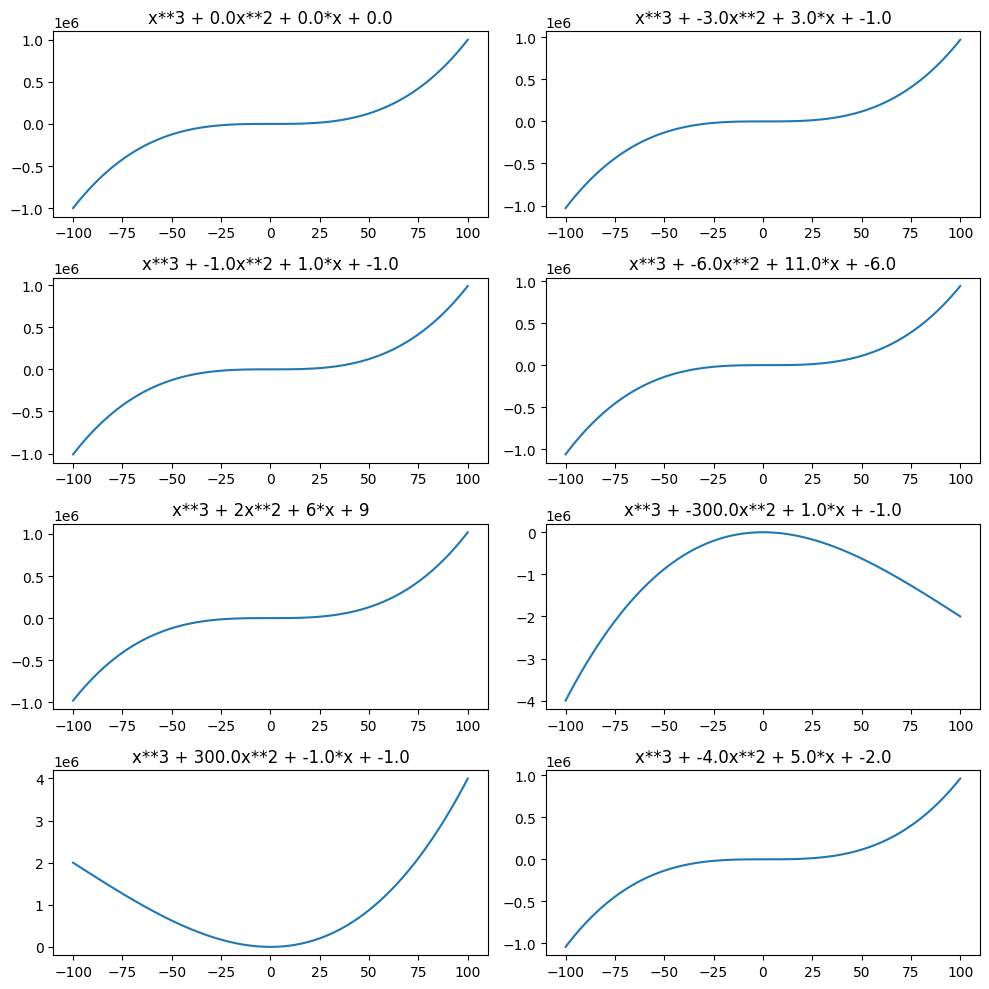

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(-100, 100, 100)

fig, axs = plt.subplots(4, 2, figsize=(10, 10))

for ax, variant in zip(axs.flatten(), variants):
    y_values = []
    for x in x_values:
        y = cubic_evaluation(variant['b'], variant['c'], variant['d'], x)
        y_values.append(y)

    b, c, d = variant['b'], variant['c'], variant['d']
    ax.plot(x_values, y_values)
    ax.set_title(f'x**3 + {b}x**2 + {c}*x + {d}')

plt.tight_layout()
plt.show()

 Publisth the notebook in as **pperezp_groupN_CubicEquation.ipynb** at **MetNumUN2023II/Lab5** and submit only the code of **solve_cubic(b, c,d)** in UNcode Quiz Cubic Equation.